# 2b. Dimensionality Reduction via UMAP

After scaling the data and imputing data for missing values, we are ready to conduct dimensionality reduction. I have created two separate files for this step, differing on which algorithm they use (PCA vs. UMAP). These are designed to work completely separate from one another, and only running one of the two is necessary to move on to the supervised learning analyses.

In [138]:
import numpy as np
import pandas as pd
import umap ###install with "pip install umap-learn"
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.max_rows=10
pd.options.display.max_columns=6

In [147]:
class UMAP_class:
    
    '''    
        INIT FUNCTION: 
        
        --Input csv file with raw data. Specify "IDs" -- any columns not to be scaled.
        
        --In the sample data, for example, the "IDs" are the ID column and the outcome variable column.
        
        --Output from this function includes a dataframe of only specified IDs and a dataframe of all other columns.
    '''

    def __init__(self, datafile, IDs = []):
        self.data = pd.read_csv(datafile)
        self.IDs = IDs
        self.IDdf = self.data.filter(IDs)
        self.nonIDdf = pd.DataFrame(self.data.drop(self.IDs, axis=1))
        
                
    '''
        ANALYSIS METHOD:
        
        --Runs UMAP using customizable parameters.
        
        --The metric must be from a list of UMAP metrics.
        
        --The n_neighbors value can be from 1 to the number of observations (participants) in the data.
        
        --The min_dist value is a decimal from 0 to 1.
        
        --The n_components input is an integer to specify the number of dimensions created by UMAP.
    '''
        
    def analysis(self, metric, n_neighbors=[], min_dist=[], n_components=[]):
        self.reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric=metric, random_state=42)
        self.umapdata = self.reducer.fit_transform(self.nonIDdf)
        self.umapdf = pd.DataFrame(self.reducer.fit_transform(self.nonIDdf))
        self.n_components = n_components
        
        
    '''
        SCALE METHOD:
        
        --Specify which scaler to use.
        
        --This method scales the UMAP output data for use in analysis.
        
        --Optional step (you can bypass it via the df_create method) but highly recommended
    '''
        
    def scale(self, scaler):
        self.scaler = scaler
        self.scaledumap = self.scaler.fit_transform(self.umapdf)
        self.scaledumapdf = pd.DataFrame(self.scaledumap)
        
    '''
        DF_CREATE METHOD:
        
        --umap_data: Specify which dataset you are using to create the dataframe.
        
        --Suggested responses are self.umapdata (if you want to bypass scaling) or self.scaledumap (if you want to use scaled data)
    '''
    
    def df_create(self, umap_data=[]):
        
        def prepend(list, str): 
            str += '{0}'
            list = [str.format(i) for i in list] 
            return(list) 
        
        self.rangemax = self.n_components+1
        self.complist = list(range(1,self.rangemax))
        self.compstr = "UMAP Dim. #"
        self.compcols = prepend(self.complist, self.compstr)
        self.compdf = pd.DataFrame(data = umap_data, columns = self.compcols)
        self.concatlist = [self.IDdf, self.compdf]
        self.umapdf = pd.concat(self.concatlist, axis=1)
        
    '''
        SCATTER2D and SCATTER3D METHODS:
        
        --Specify x-axis, y-axis, (z-axis), and hue values (columns from self.umapdf -- hue value shuold be the outcome var.).
        
        --Specify figure size.
        
        --Creates scatter plot of UMAP data.
        
        ###Future Functionality
            -3D plotting (currently throws errors)
            -iterative plotting of any two possible variables (for UMAPs with >3 components)
    '''
    
    def scatter2D(self, x, y, hue, figsize=[]):
        sns.set(rc={'figure.figsize':figsize})
        sns.set_style("whitegrid", {'axes.grid' : False})
        sns.scatterplot(x=x, y=y, hue=hue, data=self.umapdf)
        
#     def scatter3D(self, x, y, z, hue, figsize=[]):
#         self.fig = plt.figure(figsize=figsize)
#         self.ax = Axes3D(self.fig) # Method 1
#         # ax = fig.add_subplot(111, projection='3d') # Method 2
#         self.ax.scatter(x=x, y=y, z=z, c=hue, marker='o', data=self.umapdf)
#         plt.show()
        
    '''
        CSV METHOD:
        
        --Specify a filename for the final, scaled output data of the UMAP.
    '''
        
    def csv(self, csvname):
        self.umapdf.to_csv(csvname, index=False)

In [148]:
#I have read in the csv data file that we output at the end of Step 1 (KNN Imputation).
#I have specified the ID column and the presence outcome column as not to be reduced by UMAP.
reduction = UMAP_class("SCALED_NONAN_DATA.csv", IDs = ['labvisitid', 'presence'])

#I have chosen the euclidean metric. I have also chosen the below values for the other parameters after trial and error.
### Future goal:
    #I would like to figure out a way to determine the best values for these parameters
reduction.analysis('euclidean', n_neighbors=100, min_dist=0.1, n_components=20)

reduction.scale(MinMaxScaler())

reduction.df_create(umap_data=reduction.scaledumap)

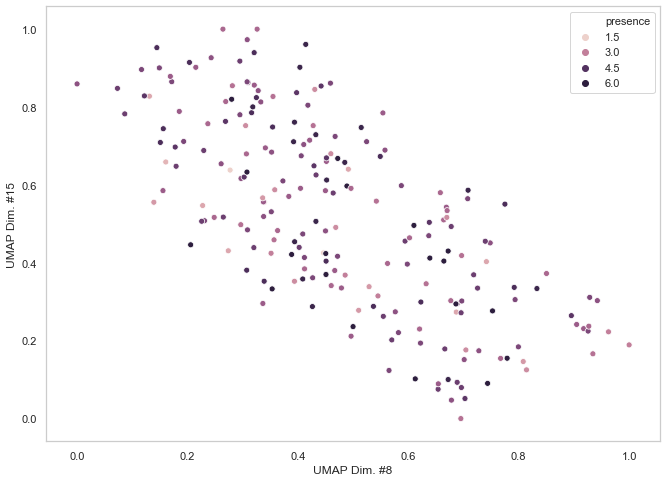

In [156]:
## Visualize any two UMAP dimensions
reduction.scatter2D(x='UMAP Dim. #8', y='UMAP Dim. #15', hue='presence', figsize=(11,8))

In [151]:
##Currently throws errors
#reduction.scatter3D(x='UMAP Dim. #1', y='UMAP Dim. #2', z='UMAP Dim. #3', hue='presence', figsize=(11,8))

In [152]:
reduction.csv("SCALED_UMAP_DATA.csv")